<a href="https://colab.research.google.com/github/alinakhaee/MNIST-Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset
in this section I impoerted the librarires and loaded the MNIST dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Training matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Training matrix shape (10000, 784)


# SVM
In this exercise we will cover the SVM leaning method to see the result of this algorithm and compare it to the previous methods. <br>
Like previous exercises, I used the `sklearn` python library. <br>


In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, adjusted_rand_score

def do_svm(svm, print_result= True):
    svm.fit(X_train, y_train)
    train_predict = svm.predict(X_train)
    test_predict = svm.predict(X_test)
    train_purity = accuracy_score(train_predict, y_train)
    train_rand_index = adjusted_rand_score(train_predict, y_train)
    test_purity = accuracy_score(test_predict, y_test)
    test_rand_index = adjusted_rand_score(test_predict, y_test)
    if print_result:
        print(f'Train Data Purity : {round(train_purity * 100, 2)}%')
        print(f'Train Data Rand-Index : {round(train_rand_index * 100, 2)}%')
        print(f'Test Data Purity : {round(test_purity * 100, 2)}%')
        print(f'Test Data Rand-Index : {round(test_rand_index * 100, 2)}%')

    return train_purity, train_rand_index, test_purity, test_rand_index

Same as my previous exercises, I have defined a function to perform the fitting and predicting for our dataset. <br>
after fitting the SVM, I predict both the train and test data, and return the accuracy (purity and rand-index). <br>
This library has two different implementation for svm. we will cover both of them.

# SVC vs LinearSVC
SVC or support vector classification has multiple kernels which allows us to classify non-linear data. <br>
the simplest kernel is the linear kernel. according to the documentation for the `SVC` on `sklearn` website, 
> *The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC* <br>

And since we are working on a dataset with 60 thousand data with 784 dimension, it would take a lot of time for fitting our dataset with the normal `SVC` class. <br>
But we have to consider that the `LinearSVC` class is just for the linear kernel, so for other kernels we have to use the `SVC` class.

In [ ]:
import time

start = time.time()
svm = SVC(kernel='linear')
print('SVC with linear kernel...')
do_svm(svm)
print('Time Taken(s): ', time.time() - start)
print(' ')
start = time.time()
print('linearSVC...')
linear_svm = LinearSVC()
do_svm(linear_svm)
print('Time Taken(s): ', time.time() - start)



SVC with linear kernel...
Train Data Purity : 97.07%
Train Data Rand-Index : 93.73%
Test Data Purity : 94.04%
Test Data Rand-Index : 87.45%
Time Taken(s):  736.6091244220734
 
linearSVC...


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Train Data Purity : 92.63%
Train Data Rand-Index : 84.71%
Test Data Purity : 91.81%
Test Data Rand-Index : 83.07%
Time Taken(s):  123.56137490272522


In the above code I used both the `SVC` class with linear kernel and the `LinearSVC`. <br>
The execution time for the normal `SVC` is about 15 minutes, but the `LinearSVC` has only taken 2 minutes to execute. <br>
Although the accuracy of the `SVC` class is better, but it is not as much different as the execution time, and we are sure that if we improve the accuracy of `LinearSVC`, by using the same parameters we will also improve the `SVC` model too. <br>
Therefore I chose the `LinearSVC` model for the following codes. But as soon as we are done the linear kernel, we will switch back to the `SVC` class. <br>
And also the `LinearSVC` uses the one-vs-all technique and unfortunately it can not be changed, so I used the normal `SVC` for testing this parameter.

# LinearSVC

In [ ]:
duals = [True, False]

for dual in duals:
    svm = LinearSVC(dual=dual)
    print('dual: ', dual)
    train_purity, train_rand_index, test_purity, test_rand_index = do_svm(svm)
    print(' ')

dual:  True


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Train Data Purity : 92.64%
Train Data Rand-Index : 84.73%
Test Data Purity : 91.81%
Test Data Rand-Index : 83.07%
 
dual:  False
Train Data Purity : 92.63%
Train Data Rand-Index : 84.7%
Test Data Purity : 91.83%
Test Data Rand-Index : 83.11%
 


The first parameter that we are discussing is the `dual` parameter. <br>
The duality optimization is a theory which divide the solution of a problem into a *'dual*' solution and a *'primal'* solution. <br>
The primal solution is the main and more complete solution which will also take longer time, but the dual solution is a solution which is one step before the main solution. <br> 
The properties of dual solution is that its answer is too much close to the main solution, even sometimes better, and it will also produce the answer in a much slower time. <br>
According to the documentation of the `sklearn`:
> Select the algorithm to either solve the dual or primal optimization problem. Prefer `dual=False` when `n_samples > n_features`.

`n_samples` means the number of samples of our train dataset, which is 60 thousand and the `n_features` means the dimension of our data, which is 784. <br>
So `sklearn` suggests us to set `dual=False` for our problem, and also according to the code above, the `dual=False` has a slightly more accurate answer.

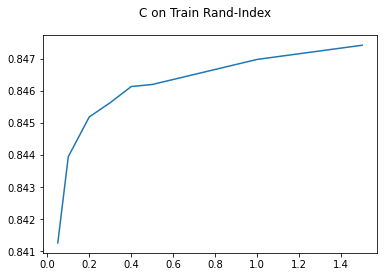

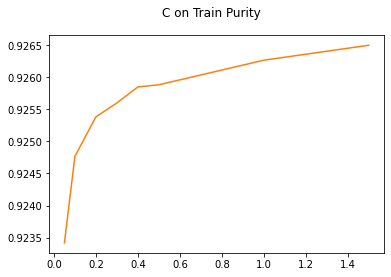

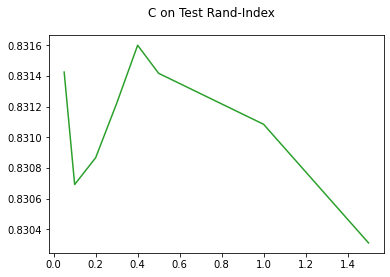

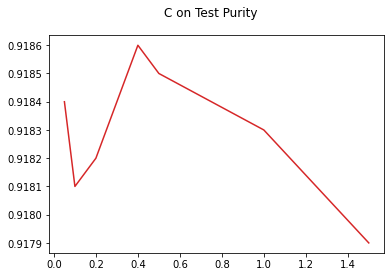

In [ ]:
coeffs = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5]
train_purities = []
train_rand_indexes = []
test_purities = []
test_rand_indexes = []

for c in coeffs :
    svm = LinearSVC(dual=False, C=c)
    train_purity, train_rand_index, test_purity, test_rand_index = do_svm(svm, False)
    train_purities.append(train_purity)
    train_rand_indexes.append(train_rand_index)
    test_purities.append(test_purity)
    test_rand_indexes.append(test_rand_index)

plt.plot(coeffs, train_rand_indexes)
plt.suptitle('C on Train Rand-Index')
plt.show()
plt.plot(coeffs, train_purities, 'tab:orange')
plt.suptitle('C on Train Purity')
plt.show()
plt.plot(coeffs, test_rand_indexes, 'tab:green')
plt.suptitle('C on Test Rand-Index')
plt.show()
plt.plot(coeffs, test_purities, 'tab:red')
plt.suptitle('C on Test Purity')
plt.show()

The above code shows the effect of `C` parameter on accuracy. <br>
Parameter `C` can be viewed as a way to control overfitting. It trades off the relative importance of maximizing the margin and fitting the training data. <br>
It is for controlling the effect of slack variables. slack variables are defined for measuring the misclassification of difficult or noisy examples. <br>
As you can see in the plots, by increasing this value, we will have a better accuracy for our training data, but less accuracy for test data. <br>
This behaviour was expected, because we are allowing more slack variables and noises to our fitting process, which will lead to less accuracy for external data. ( data which are not in the train dataset) <br>
According to the plots the best value for this parameter is 0.4. <br>

# SVC
Up to now all our codes have used the `LinearSVC` class and we have figured out that the best parameters are `C=0.4` and `dual=False`. <br>
These values will also have the best effect on the normal `SVC`, because they are the same but with different implementation. <br>
As I said, and just like the documentations said, the execution time of `SVC` for our full dataset will be too much, therefore I chose 20% of data randomly and work with them, we can use the result for the whole dataset and get better accuracy. <br>

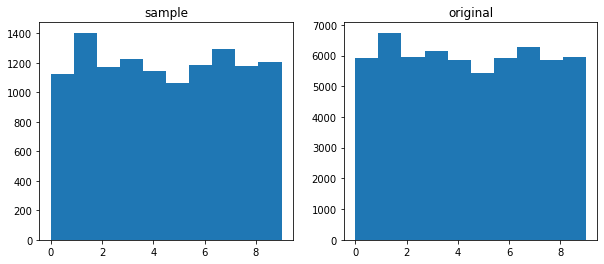

In [ ]:
seq = np.random.randint(0,60000,12000)
X_train_sample = X_train[seq]
y_train_sample = y_train[seq]

X_train_sample.shape
y_train_sample.shape

seq = np.random.randint(0,10000,2000)
X_test_sample = X_test[seq]
y_test_sample = y_test[seq]

X_test_sample.shape
y_test_sample.shape

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(y_train_sample)
ax[0].title.set_text('sample')
ax[1].hist(y_train)
ax[1].title.set_text('original')
fig.show
plt.show()

First thing to check is the belivabilty of our sample dataset. <br>
In the code above, I chose 20% of datset randomly and shows the histogram of original and random dataset. we can see that they are somehow the same and it means that we can count on the result and improvments that we apply to the random dataset.

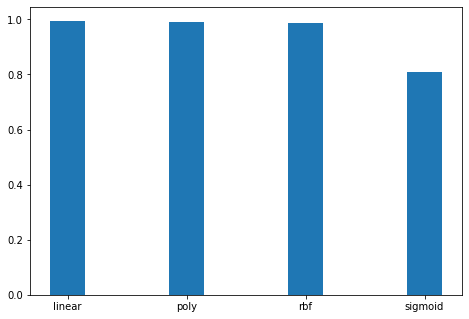

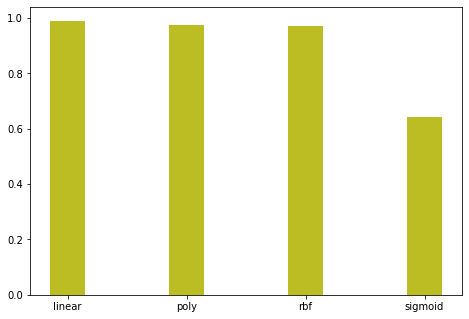

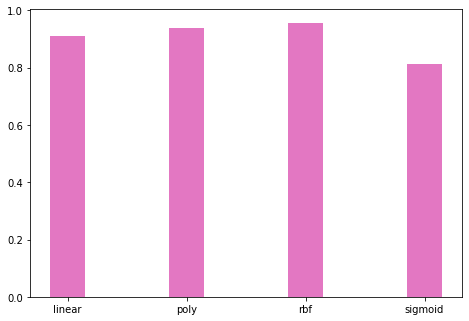

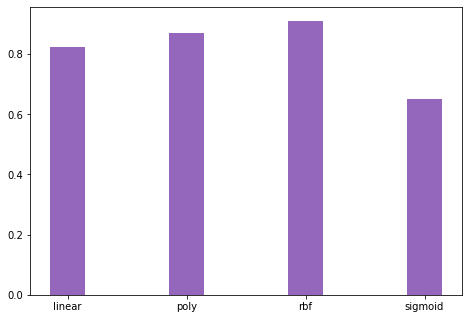

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
train_purities = []
train_rand_indexes = []
test_purities = []
test_rand_indexes = []

def show_bar_chart(x, y, title, color):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.title.set_text(title)
    ax.bar(x, y, color=color, width=0.3)
    plt.show()

for kernel in kernels :
    svm = SVC(kernel=kernel)
    svm.fit(X_train_sample, y_train_sample)
    train_predict = svm.predict(X_train_sample)
    test_predict = svm.predict(X_test_sample)
    train_purity = accuracy_score(train_predict, y_train_sample)
    train_rand_index = adjusted_rand_score(train_predict, y_train_sample)
    test_purity = accuracy_score(test_predict, y_test_sample)
    test_rand_index = adjusted_rand_score(test_predict, y_test_sample)
    train_purities.append(train_purity)
    train_rand_indexes.append(train_rand_index)
    test_purities.append(test_purity)
    test_rand_indexes.append(test_rand_index)


show_bar_chart(kernels, train_purities,'', 'tab:blue')
show_bar_chart(kernels, train_rand_indexes, '', 'tab:olive')
show_bar_chart(kernels, test_purities, '', 'tab:pink')
show_bar_chart(kernels, test_rand_indexes, '', 'tab:purple')

In this section I used the different kernels of `sklearn` and show their effect on accuracy. <br>
As it is shown in the bar plots, for the train dataset the result of linear, polynomial and gaussian(rbf) is the same but the sigmoid kernel has lower accuracy. <br>
But on the test data the difference of gaussian(rbf) kernel is observable and it has the best accuracy over other kernels. <br>
As the rbf kernel was the best kernel, for following codes I used this kernel. 
> Important Note: the default parameter for `p` in polynomial kernel is 3 and default `gamma` for the rbf is `1 / (n_features * X.var())`

In [ ]:
decision_function_shape = ['ovo', 'ovr']

for dfs in decision_function_shape :
    svm = SVC(kernel='rbf', decision_function_shape=dfs)
    svm.fit(X_train_sample, y_train_sample)
    train_predict = svm.predict(X_train_sample)
    test_predict = svm.predict(X_test_sample)
    train_purity = accuracy_score(train_predict, y_train_sample)
    train_rand_index = adjusted_rand_score(train_predict, y_train_sample)
    test_purity = accuracy_score(test_predict, y_test_sample)
    test_rand_index = adjusted_rand_score(test_predict, y_test_sample)
    print(dfs)
    print(f'Train Data Purity : {round(train_purity * 100, 2)}%')
    print(f'Train Data Rand-Index : {round(train_rand_index * 100, 2)}%')
    print(f'Test Data Purity : {round(test_purity * 100, 2)}%')
    print(f'Test Data Rand-Index : {round(test_rand_index * 100, 2)}%')
    print('')


ovo
Train Data Purity : 98.71%
Train Data Rand-Index : 97.16%
Test Data Purity : 95.8%
Test Data Rand-Index : 91.15%

ovr
Train Data Purity : 98.71%
Train Data Rand-Index : 97.16%
Test Data Purity : 95.8%
Test Data Rand-Index : 91.15%



The default technique for multiclass classification used by `SVC` is one-vs-all or one-vs-rest. <br>
In this code block I used both techniques and show the results of them. <br>
As you can see they are the exact same and we can not say which one is better. So we keep using the default value which is one-vs-rest.  

In [ ]:
gammas = ['scale', 'auto']

for gamma in gammas :
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X_train_sample, y_train_sample)
    train_predict = svm.predict(X_train_sample)
    test_predict = svm.predict(X_test_sample)
    train_purity = accuracy_score(train_predict, y_train_sample)
    train_rand_index = adjusted_rand_score(train_predict, y_train_sample)
    test_purity = accuracy_score(test_predict, y_test_sample)
    test_rand_index = adjusted_rand_score(test_predict, y_test_sample)
    print(gamma)
    print(f'Train Data Purity : {round(train_purity * 100, 2)}%')
    print(f'Train Data Rand-Index : {round(train_rand_index * 100, 2)}%')
    print(f'Test Data Purity : {round(test_purity * 100, 2)}%')
    print(f'Test Data Rand-Index : {round(test_rand_index * 100, 2)}%')
    print('')

scale
Train Data Purity : 98.71%
Train Data Rand-Index : 97.16%
Test Data Purity : 95.8%
Test Data Rand-Index : 91.15%

auto
Train Data Purity : 92.8%
Train Data Rand-Index : 84.93%
Test Data Purity : 91.9%
Test Data Rand-Index : 83.43%



The formual for rbf or gaussian kernel is below: <br>
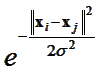 <br>
It has a paramter called gamma. `sklearn` library gives us two choice for setting this parameter. <br>
`scale` value, which is the default value, means `1 / (n_features * X.var())` and the `auto` value is `1 / n_features`. <br>
As the result shows, `scale` value has better accuracy, which was expected because the `scale` method consider the value of each data, rather than just the number of features of dataser.

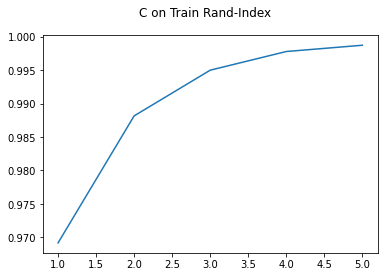

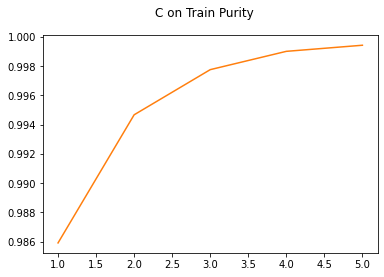

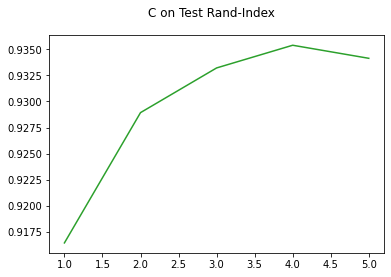

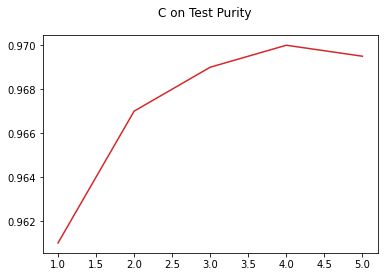

In [ ]:
Cs = [1, 2, 3, 4, 5]
train_purities = []
train_rand_indexes = []
test_purities = []
test_rand_indexes = []

for C in Cs :
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train_sample, y_train_sample)
    train_predict = svm.predict(X_train_sample)
    test_predict = svm.predict(X_test_sample)
    train_purity = accuracy_score(train_predict, y_train_sample)
    train_rand_index = adjusted_rand_score(train_predict, y_train_sample)
    test_purity = accuracy_score(test_predict, y_test_sample)
    test_rand_index = adjusted_rand_score(test_predict, y_test_sample)
    train_purities.append(train_purity)
    train_rand_indexes.append(train_rand_index)
    test_purities.append(test_purity)
    test_rand_indexes.append(test_rand_index)


plt.plot(Cs, train_rand_indexes)
plt.suptitle('C on Train Rand-Index')
plt.show()
plt.plot(Cs, train_purities, 'tab:orange')
plt.suptitle('C on Train Purity')
plt.show()
plt.plot(Cs, test_rand_indexes, 'tab:green')
plt.suptitle('C on Test Rand-Index')
plt.show()
plt.plot(Cs, test_purities, 'tab:red')
plt.suptitle('C on Test Purity')
plt.show()

For the linear kernel, best value for parameter C was 0.4. <br>
But this value will be different for the rbf kernel since. <br>
As you can see in the plots the best value for value when using rbf kernel, is 4 and it is the value we will use in the following codes.

# Conclusion
After all the tests on different kernels and paramater changing, we saw that on 20% of the whole dataset which is selected randomly, the rbf or gaussian kernel has the best performance. <br>
And for the rbf kernel, `c=4.0` and `gamma='scale'`, which is the default value, has better accuracy. <br>
Also we saw that the scores for both one-vs-one and one-vs-all techniques was the same. But we choose one-vs-all because it was the default value and prefered by `sklearn` community. <br>
So now we expect that if we set these parameters to the whole dataset, we would have a high accuracy. <br>

In [ ]:
svm = SVC(kernel='rbf', C=4)
do_svm(svm)

Train Data Purity : 99.87%
Train Data Rand-Index : 99.72%
Test Data Purity : 98.43%
Test Data Rand-Index : 96.57%


(0.9987333333333334, 0.9971579378218546, 0.9843, 0.9656544835041734)

The above code performs the rbf SVC on the whole dataset with all the 60 thousand record. <br>
As you can see the purity and rand-index are great for both train and test data, just like what we expected. <br>
Also it took about 20 minutes to be completed. <br>
Now that we have performed our final SCV, let's see the support vectors for it.

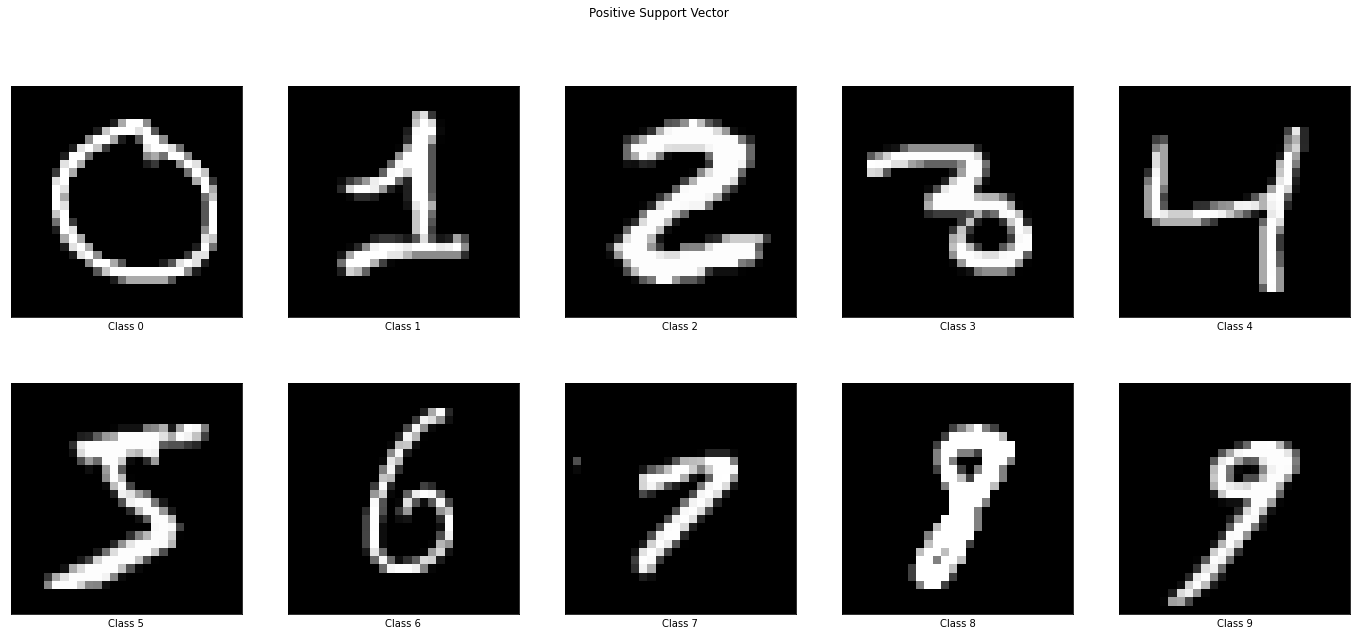

In [ ]:
n_supp = svm.n_support_
sup_vec = svm.support_

ind = 0
plt.subplots(2,5, figsize=(24,10))
for i in range(len(n_supp)):
    l1 = plt.subplot(2, 5, i + 1)
    sv_image = X_train[sup_vec[ind:ind+n_supp[i]]][0]
    l1.imshow(sv_image.reshape(28, 28), cmap=plt.cm.gist_gray)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class ' + str(i))
    ind = ind + n_supp[i]
plt.suptitle('Positive Support Vector')
plt.show()

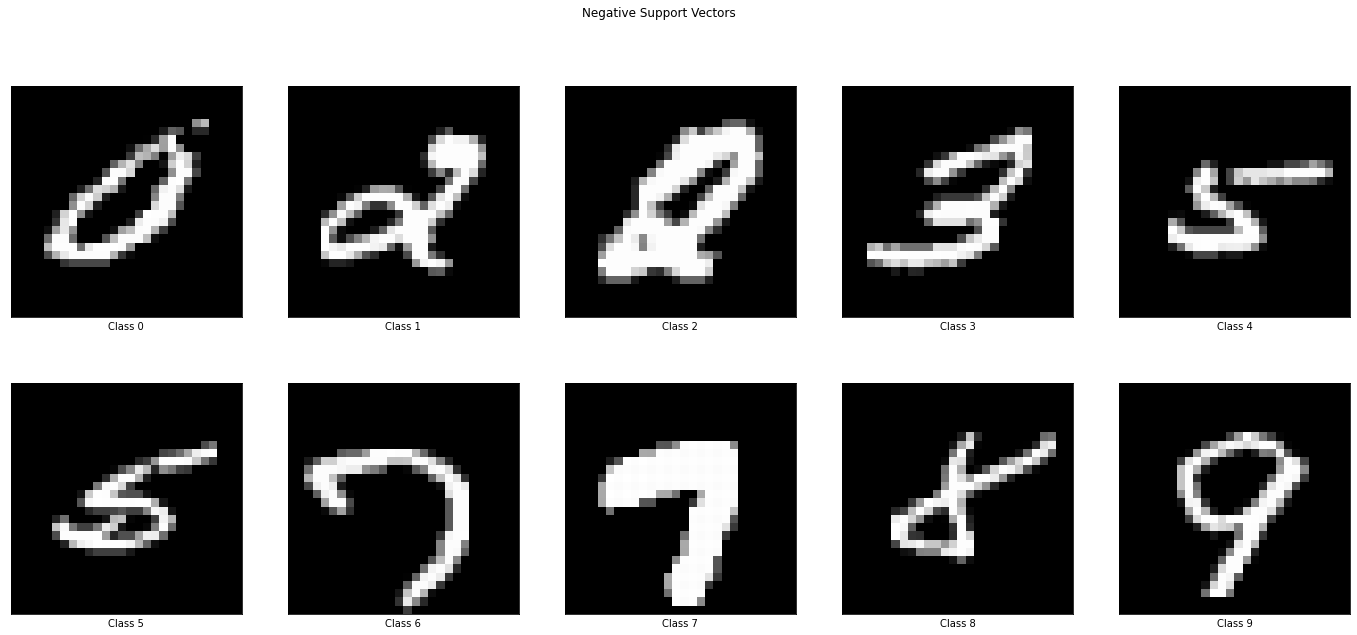

In [ ]:
plt.subplots(2,5, figsize=(24,10))

ind=0
l1 = plt.subplot(2, 5, 1)
sv_image = X_train[sup_vec[ind:ind+n_supp[0]]][len(X_train[sup_vec[ind:ind+n_supp[0]]])-1]
l1.imshow(sv_image.reshape(28, 28), cmap=plt.cm.gist_gray)
l1.set_xticks(())
l1.set_yticks(())
l1.set_xlabel('Class 0')
ind = n_supp[0]
for i in range(len(n_supp)-1):
    l1 = plt.subplot(2, 5, i + 2)
    sv_image = X_train[sup_vec[ind:ind+n_supp[i]]][len(X_train[sup_vec[ind:ind+n_supp[i]]])-1]
    l1.imshow(sv_image.reshape(28, 28), cmap=plt.cm.gist_gray)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class ' + str(i+1))
    ind = ind + n_supp[i+1]

plt.suptitle('Negative Support Vectors')
plt.show()

In the above code I showed one positive and one negative support vector for each class. <br>
Since we are using the one-vs-all technique, we will have many support vectors for each class. the number of support vectors are stored in `n_supp` array. <br>
This array has 10 elements representing 10 digits and the number stored in each element tells the number of support vectors of each digit. <br>
In the `sup_vec` array we have the indices of support vectors and we can use them to find supprt vectors in our dataset. <br>
You can see that in the positive support vectors, all digits are clean and in a better shape and they are looking looking like the original known format. <br>
But in the negative support vectors we have digits that are not in their correct class, for example we have digit 5 in the digit 4 class. <br>
And we also have dirty digits which are in their correct class. for example digit 7. <br>
And at last we have some digits that they are not even recognizable for humans. such as digit shown in class 6.
